**Final Project on Product Analytics**

In [1]:
import pandas as pd
from operator import attrgetter
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import colors as mcolors
import numpy as np

In [2]:
# датасет с описанием пользователей
df_customers = pd.read_csv('./olist_customers_dataset.csv')
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
# датасет с описанием заказов пользователей
df_orders = pd.read_csv('./olist_orders_dataset.csv')
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [4]:
# Приведение колонок к типу datetime
list_datas = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
for item in list_datas:
    df_orders[item] = pd.to_datetime(df_orders[item])

In [5]:
# корректный формат дат
df_orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [6]:
# датасет с описанием состава заказа
df_order_items = pd.read_csv('./olist_order_items_dataset.csv')
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [7]:
df_order_items['shipping_limit_date'] = pd.to_datetime(df_order_items['shipping_limit_date'])

In [8]:
df_order_items.dtypes

order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object

**Задание 1 Месячный когортный анализ**

Задание: Оценить месячный `retention` в оформление заказа с помощью когортного анализа.

В качестве основной переменной будем использовать `order_purchase_timestamp`(время создания заказа). 

По этой переменной мы определим точку входа в когорту (когорта - месяц первого заказа для конкретного `customer_unique_id`), а так же событие удержания - пользователь сделал заказ в следующем месяце.

In [9]:
# объединяем датафреймы с уникальными id пользователей и заказами

df_orders_customers = pd.merge(df_orders, df_customers, on='customer_id')
df_orders_customers.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [10]:
# выделяем нужные нам поля
df_orders_customers = df_orders_customers[['customer_unique_id', 'order_purchase_timestamp']]
df_orders_customers.head()

,customer_unique_id,order_purchase_timestamp
0,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33
1,af07308b275d755c9edb36a90c618231,2018-07-24 20:41:37
2,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08 08:38:49
3,7c142cf63193a1473d2e66489a9ae977,2017-11-18 19:28:06
4,72632f0f9dd73dfee390c9b22eb56dd6,2018-02-13 21:18:39


In [11]:
# Приводим к типу datetime
df_orders_customers['order_purchase_timestamp'] = pd.to_datetime(df_orders_customers['order_purchase_timestamp'])

In [12]:
# извлекаем месяц и день заказа
df_orders_customers['order_period'] = df_orders_customers['order_purchase_timestamp'].dt.to_period('M')
df_orders_customers['order_period_day'] = df_orders_customers['order_purchase_timestamp'].dt.to_period('D')


In [13]:
# Смотрим, когда клиент совершил первое активное действие
# (выбираем мин. дату)
df_orders_customers['cohort'] = df_orders_customers.groupby('customer_unique_id')['order_purchase_timestamp'].transform('min').dt.to_period('M')
df_orders_customers['cohort_day'] = df_orders_customers.groupby('customer_unique_id')['order_purchase_timestamp'].transform('min').dt.to_period('D')


Рассчитаем в какой период (по месяцам) происходит текущий заход: 

`день текущего захода клиента` - `день его первого захода` / 30

In [14]:
df_orders_customers['period_number_month'] = np.floor((df_orders_customers.order_period_day - df_orders_customers.cohort_day).apply(attrgetter('n')) / 30)

In [15]:
df_orders_customers.head()

,customer_unique_id,order_purchase_timestamp,order_period,order_period_day,cohort,cohort_day,period_number_month
0,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,2017-10,2017-10-02,2017-09,2017-09-04,0.0
1,af07308b275d755c9edb36a90c618231,2018-07-24 20:41:37,2018-07,2018-07-24,2018-07,2018-07-24,0.0
2,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08 08:38:49,2018-08,2018-08-08,2018-08,2018-08-08,0.0
3,7c142cf63193a1473d2e66489a9ae977,2017-11-18 19:28:06,2017-11,2017-11-18,2017-11,2017-11-18,0.0
4,72632f0f9dd73dfee390c9b22eb56dd6,2018-02-13 21:18:39,2018-02,2018-02-13,2018-02,2018-02-13,0.0


In [16]:
# выполним группировку по когортам и месячным периодам
# рассчитаем количество пользователей для каждого месяца отдельной когорты

df_cohort = df_orders_customers.groupby(['cohort', 'period_number_month']).agg(n_customers=('customer_unique_id', 'nunique')).reset_index()

In [17]:
df_cohort.head() # получаем, что клиенты у нас почти не возвращаются

,cohort,period_number_month,n_customers
0,2016-09,0.0,4
1,2016-10,0.0,321
2,2016-10,6.0,1
3,2016-10,9.0,1
4,2016-10,11.0,1


In [18]:
# Сделаем pivot полученной таблицы
cohort_pivot = df_cohort.pivot_table(index='cohort', columns='period_number_month', values='n_customers')

In [19]:
cohort_pivot

period_number_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,19.0,20.0,21.0
cohort,,,,,,,,,,,,,,,,,,,,,
2016-09,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,321.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,...,1.0,NaN,1.0,NaN,1.0,NaN,1.0,2.0,1.0,1.0
2016-12,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,764.0,2.0,NaN,4.0,1.0,1.0,3.0,2.0,NaN,NaN,...,5.0,3.0,2.0,NaN,2.0,2.0,2.0,1.0,NaN,NaN
2017-02,1752.0,3.0,3.0,6.0,4.0,2.0,4.0,2.0,2.0,5.0,...,6.0,2.0,3.0,2.0,1.0,2.0,4.0,NaN,NaN,NaN
2017-03,2636.0,7.0,14.0,11.0,3.0,2.0,9.0,4.0,7.0,6.0,...,5.0,5.0,3.0,7.0,2.0,3.0,3.0,NaN,NaN,NaN
2017-04,2352.0,8.0,6.0,1.0,8.0,8.0,6.0,10.0,5.0,6.0,...,4.0,NaN,2.0,2.0,2.0,4.0,NaN,NaN,NaN,NaN
2017-05,3596.0,16.0,15.0,12.0,13.0,12.0,12.0,5.0,11.0,10.0,...,11.0,7.0,4.0,9.0,5.0,NaN,NaN,NaN,NaN,NaN
2017-06,3139.0,13.0,14.0,12.0,4.0,16.0,10.0,6.0,4.0,11.0,...,8.0,2.0,8.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# рассчитываем размеры когорт (первый столбец таблицы)
cohort_size = cohort_pivot.iloc[:, 0]
cohort_size.head()

cohort
2016-09       4.0
2016-10     321.0
2016-12       1.0
2017-01     764.0
2017-02    1752.0
Freq: M, Name: 0.0, dtype: float64

In [21]:
# Вычисляем коэффициенты удержания(retention) по строкам(axis=0)
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)

In [22]:
retention_matrix.head()

period_number_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,19.0,20.0,21.0
cohort,,,,,,,,,,,,,,,,,,,,,
2016-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,1.0,NaN,NaN,NaN,NaN,NaN,0.003115,NaN,NaN,0.003115,...,0.003115,NaN,0.003115,NaN,0.003115,NaN,0.003115,0.006231,0.003115,0.003115
2016-12,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,1.0,0.002618,NaN,0.005236,0.001309,0.001309,0.003927,0.002618,NaN,NaN,...,0.006545,0.003927,0.002618,NaN,0.002618,0.002618,0.002618,0.001309,NaN,NaN
2017-02,1.0,0.001712,0.001712,0.003425,0.002283,0.001142,0.002283,0.001142,0.001142,0.002854,...,0.003425,0.001142,0.001712,0.001142,0.000571,0.001142,0.002283,NaN,NaN,NaN


In [23]:
# Посмотрим на медианный retention первого месяца
retention_matrix[1.0].median()

0.0037001541519613807

In [24]:
# Название когорты с самым высоким retention за 3 месяц
retention_matrix[3.0].idxmax()

Period('2017-01', 'M')

Построим тепловую карту, удобную для восприятия

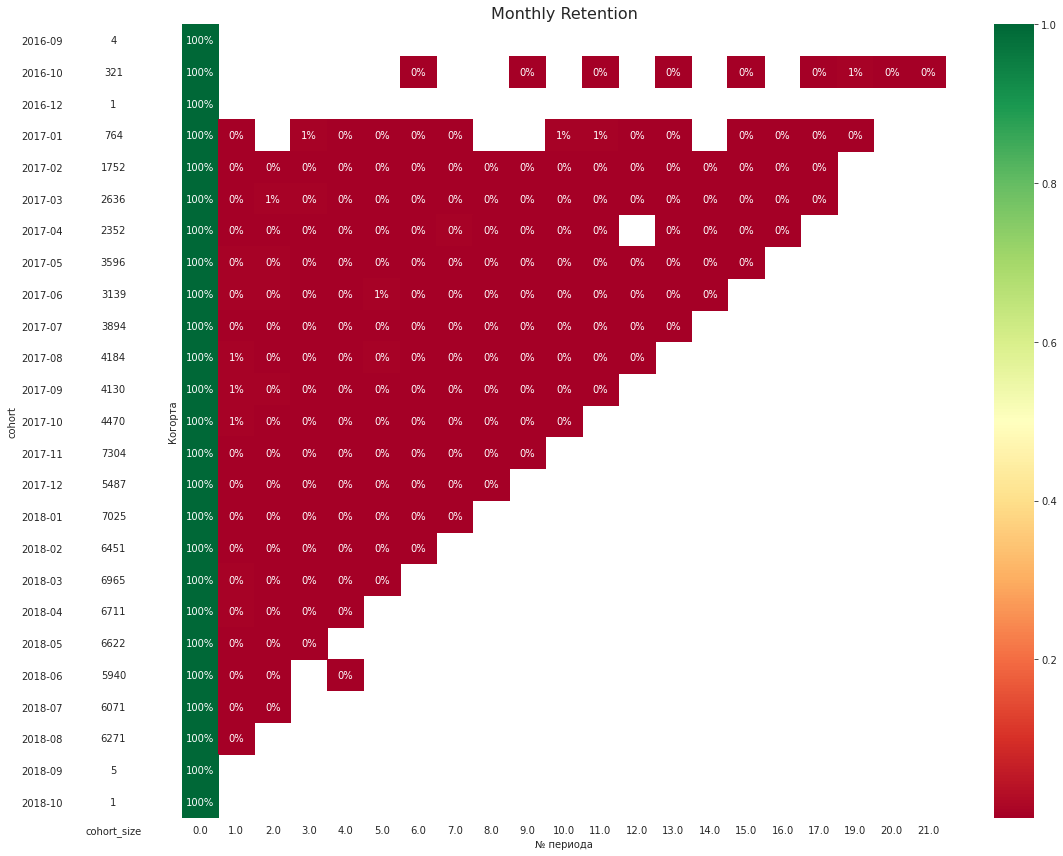

In [25]:
# Строим тепловую карту когортного анализа
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(16, 12), sharey=True, gridspec_kw={'width_ratios': [1, 11]})

    # Тепловая карта для коэффициентов удержания
    sns.heatmap(retention_matrix,
                mask=retention_matrix.isnull(),
                annot=True,
                fmt='.0%',
                cmap='RdYlGn',
                ax=ax[1])
    ax[1].set_title('Monthly Retention', fontsize=16)
    ax[1].set(xlabel='№ периода', ylabel='Когорта')

    # Тепловая карта для размеров когорт
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df,
                annot=True,
                cbar=False,
                fmt='g',
                cmap=white_cmap,
                ax=ax[0])

    fig.tight_layout()
    plt.show()

**Задание 2 Produc/Market Fit маркетплейса**

`Product/Market Fit` - это состояние, когда продукт удовлетворяет потребностям рынка и пользователей, пользователи активно его используют, а основные метрики растут органическим образом.

`Retention` около нуля из `когортного анализа` показывает на **отсутствие PMF**. В качестве визуального подтверждения построим график активных пользователей в каждом месяце.


**Построим график метрики MAU**

In [26]:
# MAU - количество активных пользователей в каждом месяце

# Рассчитаем количество активных пользователей в каждом месяце
df_mau = cohort_pivot.reset_index()

In [27]:
# развернем в длинный вид
melted = df_mau.melt(id_vars="cohort", var_name="period_number_month", value_name="users")
melted["period_number_month"] = melted["period_number_month"].astype(int)

# Преобразуем тип когорты Period к типу datetime
if pd.api.types.is_period_dtype(melted["cohort"]):
    melted["cohort"] = melted["cohort"].dt.to_timestamp()

In [28]:
melted.dtypes

cohort                 datetime64[ns]
period_number_month             int64
users                         float64
dtype: object

In [29]:
melted.head()

,cohort,period_number_month,users
0,2016-09-01,0,4.0
1,2016-10-01,0,321.0
2,2016-12-01,0,1.0
3,2017-01-01,0,764.0
4,2017-02-01,0,1752.0


In [30]:
# вычисляем календарные месяцы активности через генератор

# melted.itertuples() - итератор кортежей с объектами каждой строки
melted["calendar_month"] = [
    row.cohort + pd.DateOffset(months=row.period_number_month)
    for row in melted.itertuples()
]

In [31]:
melted.tail()

,cohort,period_number_month,users,calendar_month
520,2018-06-01,21,NaN,2020-03-01
521,2018-07-01,21,NaN,2020-04-01
522,2018-08-01,21,NaN,2020-05-01
523,2018-09-01,21,NaN,2020-06-01
524,2018-10-01,21,NaN,2020-07-01


In [32]:
# считаем метрику MAU
mau = melted.groupby("calendar_month")["users"].sum().reset_index()

In [33]:
# Добавляем фильтр по периоду, убирая даты без первых когорт
mau = mau[mau["calendar_month"] <= "2018-10-31"]
mau.tail()

,calendar_month,users
21,2018-06-01,6088.0
22,2018-07-01,6244.0
23,2018-08-01,6350.0
24,2018-09-01,10.0
25,2018-10-01,2.0


In [34]:
# оставляем только год и месяц в calendar_month
mau['calendar_month'] = mau['calendar_month'].dt.strftime('%Y-%m')
mau.head()

,calendar_month,users
0,2016-09,4.0
1,2016-10,321.0
2,2016-11,0.0
3,2016-12,1.0
4,2017-01,764.0


In [35]:
mau.dtypes

calendar_month     object
users             float64
dtype: object

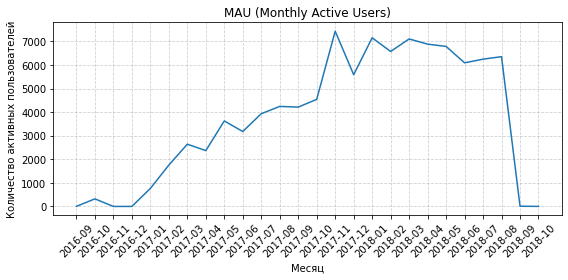

In [36]:
plt.figure(figsize=(8,4))
sns.lineplot(data=mau, x="calendar_month", y="users")
plt.title("MAU (Monthly Active Users)")
plt.xlabel("Месяц")
plt.ylabel("Количество активных пользователей")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

Видим, что метрика `MAU` вышла на плато к концу 2017 года, а затем упала в конце 2018 года. Продукт представляет из себя "дырявое ведро", которое нельзя масштабировать. Пользователи утекают и не задерживаются в продукте. Необходимо сконцентрироваться на `удержании пользователей`.

**Возможные причины отсутствия PMF:**

1. Плохой пользовательский опыт (баги, вылеты приложения, сложность или невозможность оформления второго заказа).
2. Продукт интересен пользователю идейно (просто попробовать), но не дает реальной пользы.
3. Попадание не в тот сегмент аудитории.
4. Есть альтернативные маркетплейсы, что решают задачи доставки товаров лучше.

**Задание 3. Пять основных метрик продукта**

1. Первая метрика должна отражать рост объёма продаж маркетплейса. В качестве первой метрики примем `Revenue` (Выручку). 

2. Вторая — показывать объем аудитории, которой продукт доставляет ценность. В качестве второй метрики возьмем `MAU`, которая хорошо показывает объем ценной аудитории.

3. Третья — отражает заинтересованность новых клиентов в продукте. Примем в качестве третьей метрики `Activation Rate`, т е долю новых пользователей, которые совершили ценное действие( например, оплатили первый заказ).

4. Четвёртая — отражает вовлеченность клиента в продолжение использования продукта. В качестве четвертой метрики принимаем `Retention Rate` - долю пользователей, которые остаются в продукте через 1 месяц.

5. Пятая — отражает денежное выражение вовлеченности клиента. Примем в качестве пятой метрики `ARPU (Revenue per Active User)` - сколько в среднем денег приносит один активный пользователь в месяц.

**Построим график Revenue по месяцам**

In [37]:
# выделим из заказов пользователей только те, которые были доставлены
df_delivery = df_orders[df_orders['order_status'] == "delivered"]

In [38]:
# объеденим полученные данные с датасетом df_order_items
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [39]:
df_delivery_order = pd.merge(df_delivery, df_order_items, on='order_id')
df_delivery_order.shape

(110197, 14)

In [40]:
# выделим интересующие нас колонки - дату создания заказа и стоимость товаров
df_revenue = df_delivery_order[['order_purchase_timestamp', 'price']]

In [41]:
# выделим месяц создания заказа
df_revenue['order_mounth'] = df_revenue['order_purchase_timestamp'].dt.strftime('%Y-%m')

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [42]:
df_revenue.head()

,order_purchase_timestamp,price,order_mounth
0,2017-10-02 10:56:33,29.99,2017-10
1,2018-07-24 20:41:37,118.70,2018-07
2,2018-08-08 08:38:49,159.90,2018-08
3,2017-11-18 19:28:06,45.00,2017-11
4,2018-02-13 21:18:39,19.90,2018-02


In [43]:
# Подсчитаем сумму заказов в каждом месяце
df_revenue_res = df_revenue.groupby('order_mounth').agg({'price':'sum'}).rename(columns={'price':'money'}).reset_index()

In [44]:
df_revenue_res.head()

,order_mounth,money
0,2016-09,134.97
1,2016-10,40325.11
2,2016-12,10.90
3,2017-01,111798.36
4,2017-02,234223.40


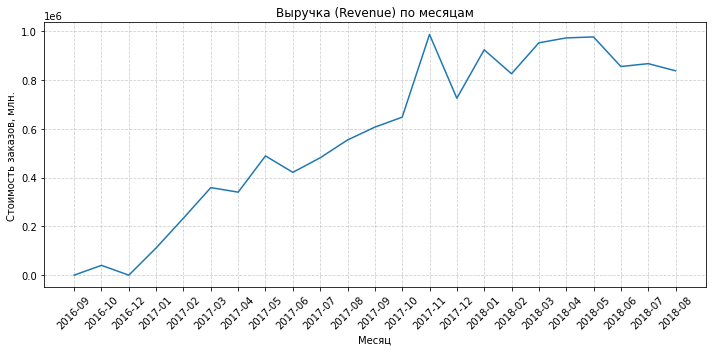

In [45]:
# Построим график выручки по месяцам
plt.figure(figsize=(10,5))
sns.lineplot(data=df_revenue_res, x='order_mounth', y='money')
plt.title("Выручка (Revenue) по месяцам")
plt.xlabel("Месяц")
plt.ylabel("Стоимость заказов, млн.")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

Видим, что график выручки приближается к 1 млн., а затем выходит на плато.

**Посторим график MAU (ранее уже приводили его)**

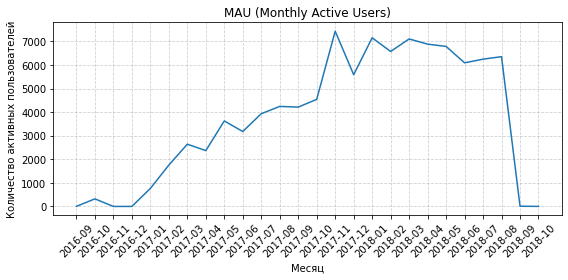

In [46]:
plt.figure(figsize=(8,4))
sns.lineplot(data=mau, x="calendar_month", y="users")
plt.title("MAU (Monthly Active Users)")
plt.xlabel("Месяц")
plt.ylabel("Количество активных пользователей")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

Наблюдаем резкое падение числа активных пользователей в конце 2018 года.

**Посторим график Retention Rate**

Используем месячную гранулярность. Визуализируем данные для когорты пользователей за 2017-02

In [47]:
retention_matrix.head()

period_number_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,19.0,20.0,21.0
cohort,,,,,,,,,,,,,,,,,,,,,
2016-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,1.0,NaN,NaN,NaN,NaN,NaN,0.003115,NaN,NaN,0.003115,...,0.003115,NaN,0.003115,NaN,0.003115,NaN,0.003115,0.006231,0.003115,0.003115
2016-12,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,1.0,0.002618,NaN,0.005236,0.001309,0.001309,0.003927,0.002618,NaN,NaN,...,0.006545,0.003927,0.002618,NaN,0.002618,0.002618,0.002618,0.001309,NaN,NaN
2017-02,1.0,0.001712,0.001712,0.003425,0.002283,0.001142,0.002283,0.001142,0.001142,0.002854,...,0.003425,0.001142,0.001712,0.001142,0.000571,0.001142,0.002283,NaN,NaN,NaN


In [50]:
# Возьмем данные для 5 когорты пользователей 2017-02
number_month = retention_matrix.columns.astype(str)
retention_rates = retention_matrix.iloc[4].fillna(0).mul(100)

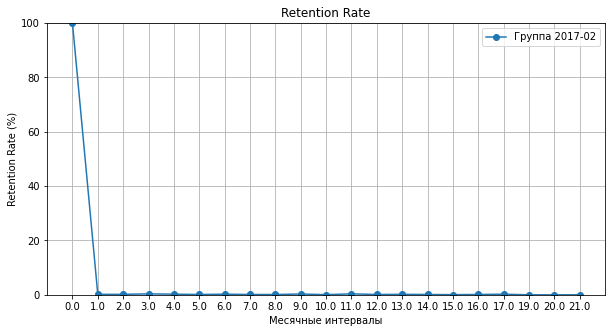

In [51]:
# Построение графика
plt.figure(figsize=(10,5))
plt.plot(number_month, retention_rates, marker='o', label='Группа 2017-02')
plt.title('Retention Rate')
plt.xlabel('Месячные интервалы')
plt.ylabel('Retention Rate (%)')
plt.ylim(0, 100)
plt.grid()
plt.legend()
plt.show()

**Построим график ARPU**

`ARPU (Revenue per Active User)` - это средняя выручка на одного  пользователя за определенный период. В качестве периода возьмем один месяц. Для получения метрики необходимо поделить выручку за месяц (`Revenue`) на количество активных пользователей в этом же месяце (`MAU`).

In [52]:
mau.head()

,calendar_month,users
0,2016-09,4.0
1,2016-10,321.0
2,2016-11,0.0
3,2016-12,1.0
4,2017-01,764.0


In [53]:
df_revenue_res = df_revenue_res.rename(columns={'order_mounth':'calendar_month'})

In [54]:
df_arpu = pd.merge(mau, df_revenue_res, on='calendar_month')

In [55]:
df_arpu.head()

,calendar_month,users,money
0,2016-09,4.0,134.97
1,2016-10,321.0,40325.11
2,2016-12,1.0,10.90
3,2017-01,764.0,111798.36
4,2017-02,1754.0,234223.40


In [56]:
df_arpu['arpu'] = df_arpu['money'] / df_arpu['users']

In [57]:
df_arpu.head()

,calendar_month,users,money,arpu
0,2016-09,4.0,134.97,33.742500
1,2016-10,321.0,40325.11,125.623396
2,2016-12,1.0,10.90,10.900000
3,2017-01,764.0,111798.36,146.332932
4,2017-02,1754.0,234223.40,133.536716


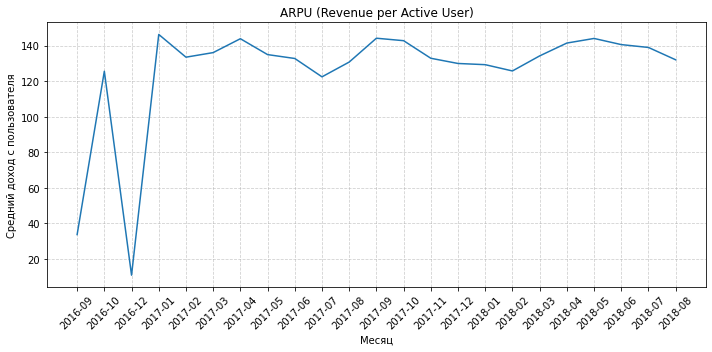

In [58]:
# Строим график ARPU в зависимости от месяца
plt.figure(figsize=(10,5))
sns.lineplot(data=df_arpu, x="calendar_month", y="arpu")
plt.title("ARPU (Revenue per Active User)")
plt.xlabel("Месяц")
plt.ylabel("Средний доход с пользователя")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

Из графика видно, что 2017-01 метрика ARPU вышла на плато в ~140 пользователей.

**Задание 4. Выбрать одну основных гипотез с помощью фреймворка ICE**

Метрика, которую собираемся улучшить - это `Retention`.

`Первая гипотеза`:
   
   Если исправим баг в системе процессинга заказов, то клиентам не придётся сталкиваться с проблемой отмены заказа, вследствие чего количество доставленных заказов увеличится.Считаем, что мы таким образом избавимся от всех отмен.

Итог: все отмены исчезли.

`Вторая гипотеза`:

Если сократим время до отгрузки заказа, то клиенты перестанут получать свой заказ с запаздыванием, вследствие чего количество заказов увеличится за счёт повторных заказов.

Итог: нет заказов с запаздыванием.

`Третья гипотеза`:

Если создадим новый способ оплаты, который будет конвертировать клиентов в повторный заказ, то клиенты не будут испытывать трудности при оформлении заказа, вследствие чего количество заказов увеличится за счёт повторных заказов тех, кто раньше не делал повторный заказ.

Итог: увеличение retention.

In [59]:
# Impact гипотезы 1 - это все отмененные заказы
df_canceled = df_orders[df_orders['order_status'] == "canceled"]
# Иcпользуем данные с июня 2017 года
df_canceled = df_canceled[df_canceled['order_purchase_timestamp'] >= '2017-06-01']

In [60]:
df_canceled.shape[0] # получили 499 заказов

499

In [61]:
# Переводим в шкалу
impact_hypothesis_1 = 4

In [62]:
# Impact гипотезы 2 - это все запоздавшие заказы
df_late = df_orders[df_orders['order_delivered_customer_date'] > df_orders['order_estimated_delivery_date']]

# Иcпользуем данные с июня 2017 года
df_late = df_late[df_late['order_purchase_timestamp'] >= '2017-06-01']

In [63]:
df_late.shape[0] # получили 7296 заказов

7296

In [64]:
# Переводим в шкалу
impact_hypothesis_2 = 8

In [65]:
# Impact гипотезы 3 - это количество вторых заказов,
# которые сделают пользователи, 
# обычно совершающие только одну покупку.

# Получаем датасет с клиентами и временем создания заказа
df_order_customer = pd.merge(df_customers, df_orders, on='customer_id')

# Иcпользуем данные с июня 2017 года
df_order_customer = df_order_customer[df_order_customer['order_purchase_timestamp'] >= '2017-06-01']

In [66]:
# Посчитаем кол-во клиентов, что сделали только один заказ
df_retry = df_order_customer.groupby('customer_unique_id')\
                                .agg({'customer_id':'count'})\
                                .rename(columns={'customer_id':'count_orders'})

In [67]:
df_retry = df_retry[df_retry['count_orders'] == 1]
count_one_order = df_retry.shape[0]

In [68]:
# Получим финальную метрику
count_one_order

82559

In [69]:
# Конверсия в повторный заказ
retention = retention_matrix[1.0].median()


count_one_order * retention # Получили 305 повторных заказов

305.4810266317796

In [70]:
# Перевод в шкалу
impact_hypothesis_3 = 3

**Рассчитаем метрику ICE для каждой гипотезы**

In [71]:
Impact = [impact_hypothesis_1, impact_hypothesis_2, impact_hypothesis_3]
Confidence = [8, 10, 5]
Ease = [6, 4, 9]

data = {'Impact': Impact, 'Confidence': Confidence, 'Ease': Ease}

In [72]:
df_hypo = pd.DataFrame(data)
df_hypo

,Impact,Confidence,Ease
0,4,8,6
1,8,10,4
2,3,5,9


In [73]:
df_hypo['ICE'] = df_hypo['Impact'] * df_hypo['Confidence'] * df_hypo['Ease']

In [74]:
df_hypo

,Impact,Confidence,Ease,ICE
0,4,8,6,192
1,8,10,4,320
2,3,5,9,135


Таким образом, мы выбираем `вторую гипотезу` из предложенных.

**Задание 5. Сформулировать метрики, на которые повлияет гипотеза**

Если сократим время до отгрузки заказа, то клиенты перестанут получать свой заказ с запаздыванием, вследствие чего количество заказов увеличится за счёт повторных заказов.

Метрики, на которые должна повлиять гипотеза:
1. Delivery time (среднее время доставки) - это операционная метрика, которая должна уменьшиться, так как уменьшится среднее время от подтверждения до доставки.

2. Share of delayed orders (доля заказов с опозданием) - метрика, которая отражает качество сервиса. Должна уменьшиться.

3. NPS (Net Promoter Score) - метрика потребительской лояльности, т е готовность клиентов рекомендовать компанию. Должна вырасти, так как своевременная доставка повышает удовлетворенность и доверие клиентов.

4. Retention rate - метрика удержания, которая должна увеличиться, так как довольные быстрой доставкой клиенты чаще совершают повторные покупки.

5. GMV (валовый объём продаж) - метрика бизнеса, которая должна вырасти из-за роста повторных заказов.

**Целевые метрики**: Количество заказов на пользователя (Orders per User) и GMV. Это ключевые метрики, ради которых была сформулирована гипотеза. Ускорение отгрузки повысит удовлетворенность и приведет к росту числа заказов у одного пользователя, что в дальнейшем увеличит выручку.

**Прокси метрики**: Delivery time (Среднее время доставки) и Share of delayed orders (доля заказов с опозданием). Данные метрики отражают операционное качество и является промежуточными на пути к росту количества заказов. Так же они дают более ранний сигнал(легче измерить и увидеть изменения после внедрения гипотезы в продукт).

**Guardrail(метрика ограничения)**: NPS (Удовлетворенность клиентов) , Return Rate (процент возвратов по вине продавца). При ускорении отгрузки может вырасти риск ошибок: не те товары, повреждения, плохой контроль бракованных товаров. Рост скорости не должен идти в ущерб качеству и клиентскому опыту.

**Задание 6. Выводы о проделанной работе.**

**Основной проблемой** нашего маркетплейса является то, что клиенты делают заказ только один раз и больше не возвращаются.Это стало понятно после анализа того, как себя ведут разные по месяцу регистрации группы пользователей - почти все уходят после первой покупки. 

Количество активных пользователей поддерживается только за счет рекламы и привлечения новых клиентов. По сути, продукт похож на "дырявое ведро" - мы "наливаем" новых пользователей, но они тут же "утекают". Это значит, что люди не видят достаточной ценности, чтобы продолжать пользоваться нашим сервисом, **Product/Market Fit отсутствует**. **Выручка** держится на одном стабильном уровне с вероятной резкой просадкой(если уменьшить расходы на рекламу).

Для улучшения пользовательского опыта и увеличения количества заказов была принята **следующая гипотеза**: Если сократим время до отгрузки заказа, то клиенты перестанут получать свой заказ с запаздыванием, вследствие чего количество заказов увеличится за счёт повторных заказов.
    
Данная гипотеза затрагивает достаточно большой сегмент аудитории, внушает большую уверенность, а так же не слишком сложна в реализации.